In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from IPython.display import Markdown


## Carregando o Conjunto de Dados 

In [10]:
# titanic
df_titanic = sns.load_dataset('titanic')
display(Markdown("## Titanic dataset"))
display(df_titanic.head())

display(Markdown("### Exploração dos dados"))
df_titanic.info()

display(Markdown("### Estatísticas descritivas"))
display(df_titanic.describe())

## Titanic dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Exploração dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Estatísticas descritivas

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Criando um Dicionário

In [11]:
df_dict = pd.DataFrame([
    {
        "variavel": "survived",
        "descricao": "Indica se um passageiro sobreviveu (1) ou não (0) a um evento",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "pcclass",
        "descricao": "Representa a classe em que um passageiro viajou (1ª, 2ª ou 3ª classe)",
        "tipo": "Qualitativa",
        "subtipo": "Ordinal",
    },{
        "variavel": "sex",
        "descricao": "Indica o sexo do passageiro",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "age",
        "descricao": "Representa a idade dos passageiros em anos",
        "tipo": "Quantitativa.",
        "subtipo": "Continua",
    },{
        "variavel": "sibsp",
        "descricao": "Indica o número de irmãos ou cônjuges que um passageiro tinha a bordo do navio",
        "tipo": "Quantitativa",
        "subtipo": "Discreta",
    },{
        "variavel": "parch",
        "descricao": "Representa o número de pais ou filhos que um passageiro tinha a bordo do navio",
        "tipo": "Quantitativa",
        "subtipo": "Discreta",
    },{
        "variavel": "fare",
        "descricao": "Indica o valor da tarifa paga pelo passageiro para viajar no navio",
        "tipo": "Quantitativa",
        "subtipo": "Contínua.",
    },{
        "variavel": "embarked",
        "descricao": "Representa o local de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton)",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "class",
        "descricao": "Refere-se à classe do passageiro",
        "tipo": "Qualitativa",
        "subtipo": "Nominal.",
    },{
        "variavel": "who",
        "descricao": "Indica o grupo demográfico ao qual o passageiro pertence, como homem, mulher ou criança",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "adult_male",
        "descricao": "Indica se o passageiro é um adulto do sexo masculino (True ou False).",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "desck",
        "descricao": "Representa o convés onde o passageiro tinha sua cabine no navio",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "embark_town",
        "descricao": "Refere-se à cidade onde o passageiro embarcou no navio",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "alive",
        "descricao": "Indica se o passageiro estava vivo (yes) ou morto (no) após o evento, como o naufrágio do Titanic",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "alone",
        "descricao": "Indica se o passageiro estava viajando sozinho (yes) ou acompanhado (no)",
        "tipo": "Qualitativo",
        "subtipo": "Nominal"
    }

])

df_dict

,variavel,descricao,tipo,subtipo
0,survied,Indica se um passageiro sobreviveu (1) ou não ...,Qualitativa,Nominal
1,pcclass,Representa a classe em que um passageiro viajo...,Qualitativa,Ordinal
2,sex,Indica o sexo do passageiro,Qualitativa,Nominal
3,age,Representa a idade dos passageiros em anos,Quantitativa.,Continua
4,sibsp,Indica o número de irmãos ou cônjuges que um p...,Quantitativa,Discreta
5,parch,Representa o número de pais ou filhos que um p...,Quantitativa,Discreta
6,fare,Indica o valor da tarifa paga pelo passageiro ...,Quantitativa,Contínua.
7,embarked,Representa o local de embarque do passageiro (...,Qualitativa,Nominal
8,class,Refere-se à classe do passageiro,Qualitativa,Nominal.
9,who,Indica o grupo demográfico ao qual o passageir...,Qualitativa,Nominal


## Dados Qualitativos 

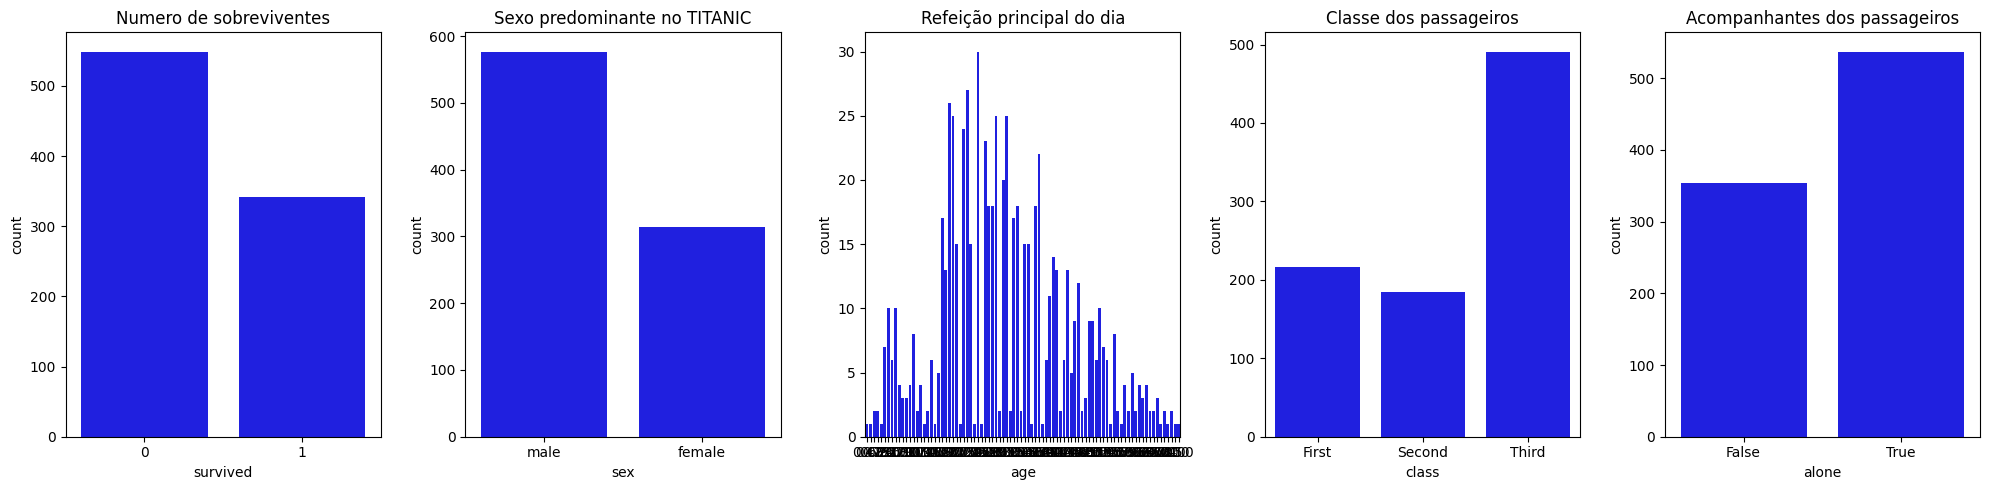

In [51]:
cor = 'blue'
# Criar uma figura com subplots
plt.figure(figsize=(20, 5))  # Defina o tamanho da figura

# Subplot 1 - Análise dos passageiros sobreviventes 
plt.subplot(1, 5, 1)  # 1 linha, 3 colunas, primeiro gráfico
sns.countplot(data = df_titanic, x="survived",color=cor)
plt.title('Numero de sobreviventes')

# Subplot 2 - Análise do sexo 
plt.subplot(1, 5, 2)  # 2 linha, 3 colunas, segundo gráfico
sns.countplot(data = df_titanic, x="sex",color=cor)
plt.title('Sexo predominante no TITANIC')

# Subplot 3 - Análise da refeição principal por sexo
plt.subplot(1, 5, 3)  # 3 linha, 3 colunas, terceiro gráfico
sns.countplot(data = df_titanic, x="age",color=cor)
plt.title('Refeição principal do dia')

# Subplot 4 - Análise da classe dos passageiros 
plt.subplot(1, 5, 4)  # 1 linha, 3 colunas, terceiro gráfico
sns.countplot(data = df_titanic, x="class",color=cor)
plt.title('Classe dos passageiros')

# Subplot 5 - Análise do acomponhante do passeiros
plt.subplot(1, 5, 5)  # 1 linha, 3 colunas, terceiro gráfico
sns.countplot(data = df_titanic, x="alone",color=cor)
plt.title('Acompanhantes dos passageiros')

# Ajustar o layout para evitar sobreposição de títulos
plt.tight_layout()

# Exibir os gráficos lado a lado
plt.show()




## Trantando os dados QUANTITATIVOS

In [52]:
print("Media:", df_titanic['age'].mean().round(2))
print("Mediana:", df_titanic['age'].median())
print("Moda:", df_titanic['age'].mode())
print("Amplitude:", df_titanic['age'].max() - df_titanic['age'].min())
print("Variância:", df_titanic['age'].var().round(2))
print("Desvio Padrão:", df_titanic['age'].std().round(2))

Media: 29.7
Mediana: 28.0
Moda: 0    24.0
dtype: float64
Amplitude: 79.58
Variância: 211.02
Desvio Padrão: 14.53


In [53]:
print("Media:", df_titanic['sibsp'].mean().round(2))
print("Mediana:", df_titanic['sibsp'].median())
print("Moda:", df_titanic['sibsp'].mode())
print("Amplitude:", df_titanic['sibsp'].max() - df_titanic['sibsp'].min())
print("Variância:", df_titanic['sibsp'].var().round(2))
print("Desvio Padrão:", df_titanic['sibsp'].std().round(2))

Media: 0.52
Mediana: 0.0
Moda: 0    0
dtype: int64
Amplitude: 8
Variância: 1.22
Desvio Padrão: 1.1


In [56]:
print("Media:", df_titanic['parch'].mean().round(2))
print("Mediana:", df_titanic['parch'].median())
print("Moda:", df_titanic['parch'].mode())
print("Amplitude:", df_titanic['parch'].max() - df_titanic['parch'].min())
print("Variância:", df_titanic['parch'].var().round(2))
print("Desvio Padrão:", df_titanic['parch'].std().round(2))

Media: 0.38
Mediana: 0.0
Moda: 0    0
dtype: int64
Amplitude: 6
Variância: 0.65
Desvio Padrão: 0.81


In [57]:
print("Media:", df_titanic['fare'].mean().round(2))
print("Mediana:", df_titanic['fare'].median())
print("Moda:", df_titanic['fare'].mode())
print("Amplitude:", df_titanic['fare'].max() - df_titanic['fare'].min())
print("Variância:", df_titanic['fare'].var().round(2))
print("Desvio Padrão:", df_titanic['fare'].std().round(2))

Media: 32.2
Mediana: 14.4542
Moda: 0    8.05
dtype: float64
Amplitude: 512.3292
Variância: 2469.44
Desvio Padrão: 49.69
